# Analisis de Datos

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


## Cargar Datos

In [2]:
footprint='./data2/U.json.individual_footprint'
footprint = pd.read_csv(footprint, sep=",", header=0)
footprint.rename(columns={'customer_id':'customer_tag'}, inplace=True)
footprint = footprint.drop(['turn'], axis=1)
# footprint.head(3)

In [3]:
individual_cluster='./data2/U.json.individual_footprint.labels'
individual_cluster = pd.read_csv(individual_cluster, sep=";", header=0, index_col=False)
# individual_cluster.head(3)

In [4]:
collective_cluster='./data2/U.json.collective_footprint.labels'
collective_cluster = pd.read_csv(collective_cluster, sep=";", header=0, index_col=False)
# collective_cluster.head(3)

## Cohesión de Datos

In [5]:
result = pd.merge(individual_cluster, collective_cluster, on=['customer_tag', 'individual_cluster'])
result = result.iloc[:, :-28]
result= pd.merge(footprint, result, on=['customer_tag','year', 'week'])

In [6]:
result1 = result.iloc[:, :-29]
result = pd.concat([result1, result[['collective_cluster']]], axis=1)


In [7]:

result[['year','week','profile_id','size','individual_cluster','collective_cluster']] = result[['year','week','profile_id','size','individual_cluster','collective_cluster']].astype(int)

In [8]:
result.head()

,customer_tag,year,week,profile_id,size,d0t0,d1t0,d2t0,d3t0,d4t0,...,d6t2,d0t3,d1t3,d2t3,d3t3,d4t3,d5t3,d6t3,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,27,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
1,++/oQ9Lb9dI=,2017,22,0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6
2,++14g8obpj0=,2016,36,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,++14g8obpj0=,2016,35,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1
4,++14g8obpj0=,2016,31,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


## Salvar Resultados

In [9]:
result.to_csv('./data2/resultados.csv',index=False)

## Grafico

In [10]:
import matplotlib.pyplot as plt

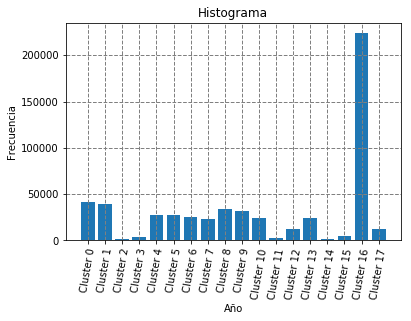

In [11]:
nn= result.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(nn)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

### Prueba codigo tabla

In [12]:
"""
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
vals = np.around(df.values,2)
normal = plt.Normalize(vals.min()-1, vals.max()+1)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.15]*vals.shape[1], loc='center', 
                    cellColours=plt.cm.hot(normal(vals)))
"""

"\nfrom matplotlib import pyplot as plt\nimport numpy as np\nrandn = np.random.randn\nfrom pandas import *\n\nidx = Index(np.arange(1,11))\ndf = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])\nvals = np.around(df.values,2)\nnormal = plt.Normalize(vals.min()-1, vals.max()+1)\n\nfig = plt.figure(figsize=(15,8))\nax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])\n\nthe_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, \n                    colWidths = [0.15]*vals.shape[1], loc='center', \n                    cellColours=plt.cm.hot(normal(vals)))\n"